In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.decomposition import PCA  # For Principal Component Analysis (PCA) to reduce dimensions
import numpy as np  # For numerical operations
from sklearn import preprocessing  # For scaling and normalization of data
from bioinfokit.visuz import cluster  # For data visualization, specifically clustering
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.utils import resample  # For resampling methods like bootstrapping
from sklearn.metrics import adjusted_rand_score  # For evaluating clustering results using Adjusted Rand Index

In [2]:
!pip install bioinfokit

In [3]:
# Reading the McDonald's dataset from the CSV file into a DataFrame
data = pd.read_csv("mcdonalds.csv")  # Load the dataset into 'data' DataFrame

# Reading the same dataset into a second DataFrame
data1 = pd.read_csv("mcdonalds.csv")  # Load the dataset again into 'data1' DataFrame

# Displaying the list of column names in the dataset
data.columns.values.tolist()  # Get the column names of the dataset as a list

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
# Getting the shape of the dataset, which returns the number of rows and columns
data.shape

(1453, 15)

In [5]:
# Displaying the first 3 rows of the dataset to inspect the data
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
# Selecting the first 11 columns of the dataset and replacing 'Yes' with 1 and 'No' with 0
MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)
# Calculating the mean of each column in the transformed DataFrame, rounded to 2 decimal places
mean=round(MD.mean(),2)
mean   # Output the mean values


C:\Users\akhil\AppData\Local\Temp\ipykernel_11232\4102938980.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  MD=data.iloc[:,0:11].replace("Yes",1).replace("No",0)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [7]:
# Initializing PCA (Principal Component Analysis) object
pca = PCA()
# Applying PCA on the MD data and transforming it to a new space with fewer dimensions
MD_pca=pca.fit_transform(MD)
# Fitting PCA on the MD data to learn the principal components (without transforming the data yet)
MD_p=pca.fit(MD)

# Calculating the standard deviation for each principal component
SD=np.sqrt(pca.explained_variance_)
# Calculating the proportion of variance explained by each principal component
PV=pca.explained_variance_ratio_
# Creating a list of principal component names (e.g., 'PC1', 'PC2', etc.)
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

# Creating a DataFrame to summarize standard deviations, proportion of variance, and cumulative variance
sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum   #Display the summary DataFrame


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [8]:
# Printing the standard deviation of each principal component, rounded to 1 decimal place
print("Standard Deviation:\n",SD.round(1))

# Getting the loadings (principal component coefficients)
load = (pca.components_)
# Extracting the rotation matrix (principal components in the original space)
i=0
rot_matrix = MD_p.components_.T

# Creating a DataFrame to display the rotation matrix, with column names as principal components
rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
# Rounding the rotation matrix values to 3 decimal places and flipping the signs
rot_df=round(-rot_df,3)
rot_df   # Display the rotated matrix DataFrame


Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,-0.055,-0.308,0.171,0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,0.142,0.278,-0.348,0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,-0.198,0.071,-0.355,-0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,0.354,-0.073,-0.407,0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,-0.254,0.361,0.209,-0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,0.097,0.108,-0.595,0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,-0.119,-0.129,-0.103,0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,0.003,-0.211,-0.077,-0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,-0.068,-0.003,-0.261,0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,-0.763,0.288,-0.178,0.350,0.176,-0.186,-0.038,0.158


In [9]:
# Displaying the rotation matrix (loadings of original features for each principal component)
rot_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,-0.055,-0.308,0.171,0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,0.142,0.278,-0.348,0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,-0.198,0.071,-0.355,-0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,0.354,-0.073,-0.407,0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,-0.254,0.361,0.209,-0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,0.097,0.108,-0.595,0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,-0.119,-0.129,-0.103,0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,0.003,-0.211,-0.077,-0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,-0.068,-0.003,-0.261,0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,-0.763,0.288,-0.178,0.350,0.176,-0.186,-0.038,0.158


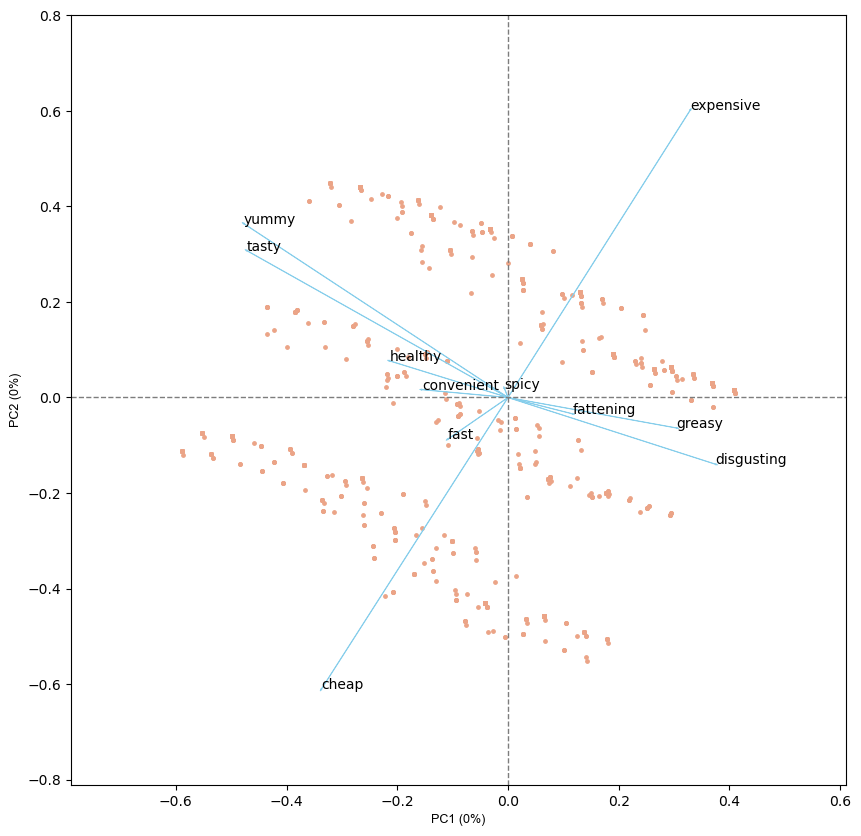

In [10]:
cluster.biplot(cscore=MD_pca, loadings=-load, labels=data.columns.values,var1=0,var2=0, show=True, dim=(10, 10))


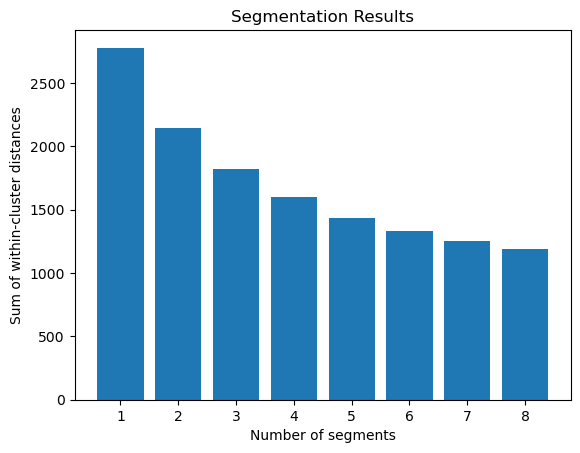

In [11]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

C:\Users\akhil\AppData\Local\Temp\ipykernel_11232\3897380082.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)


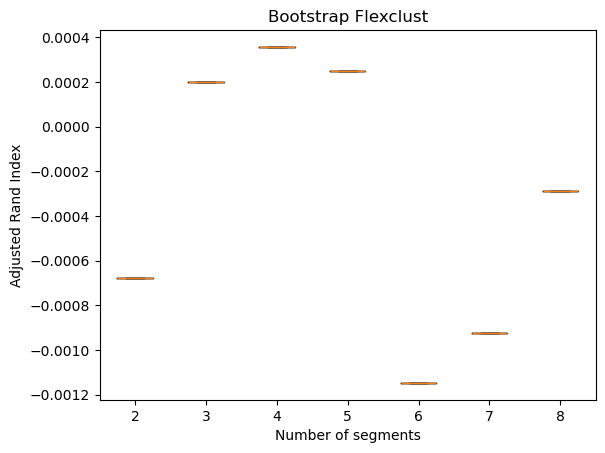

In [12]:
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

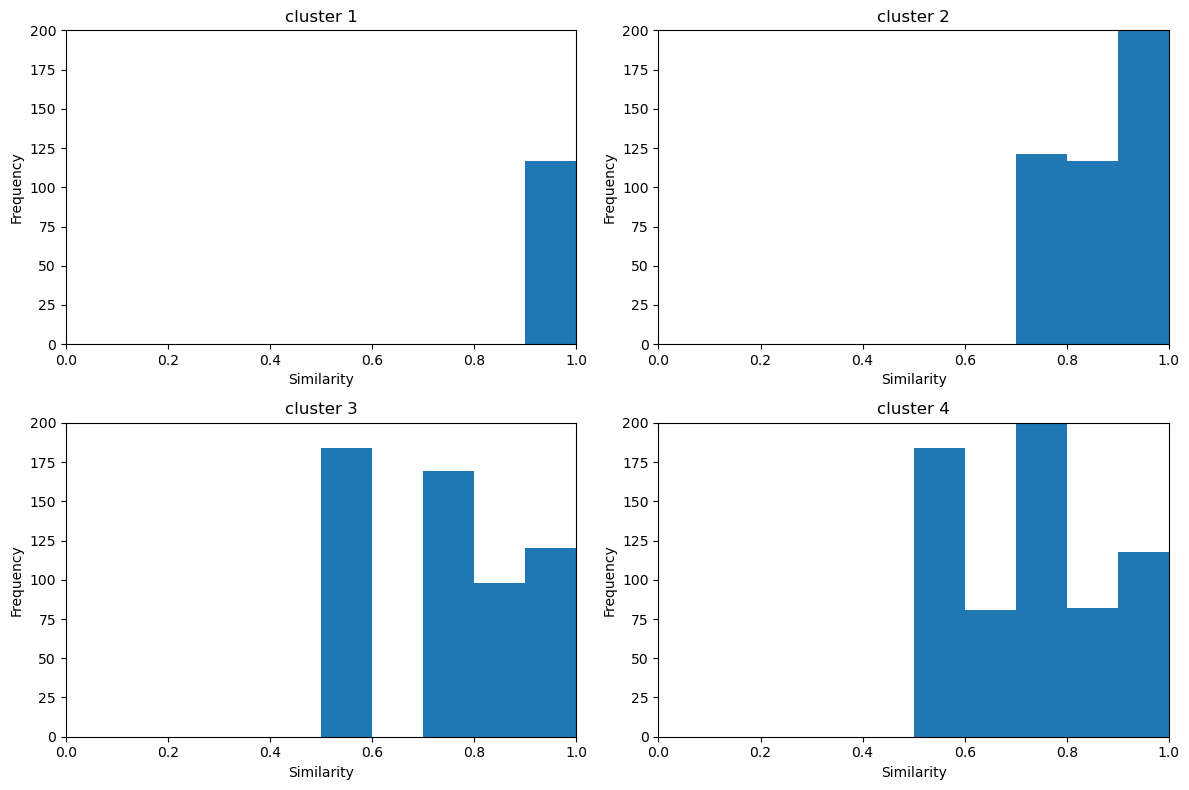

In [13]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


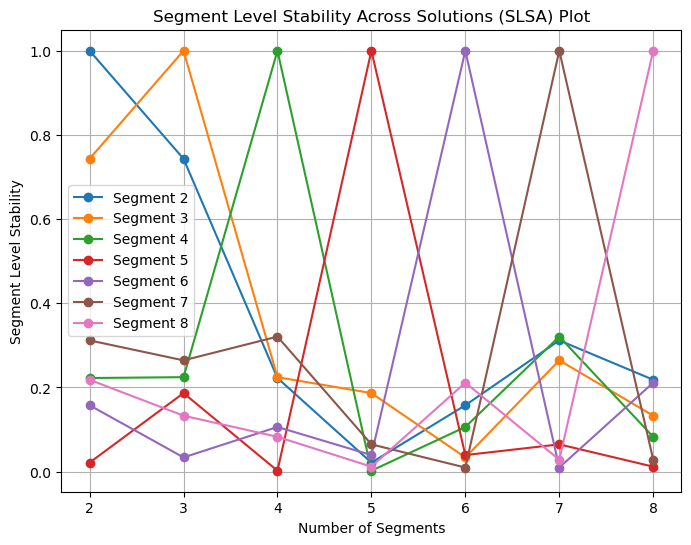

In [14]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

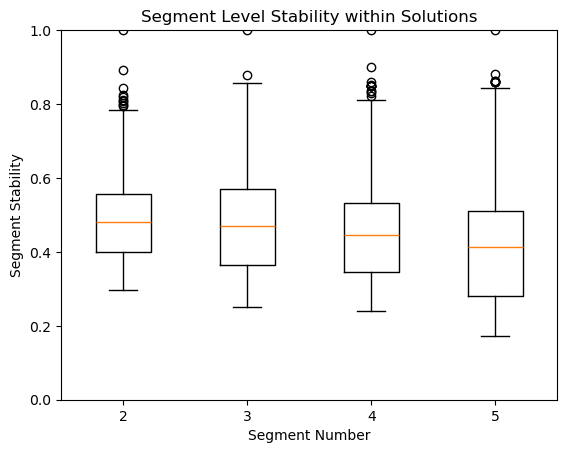

In [15]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [16]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    13       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     8       True  4   4 -1604.234391  3216.468783  3237.594326  3236.258023
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


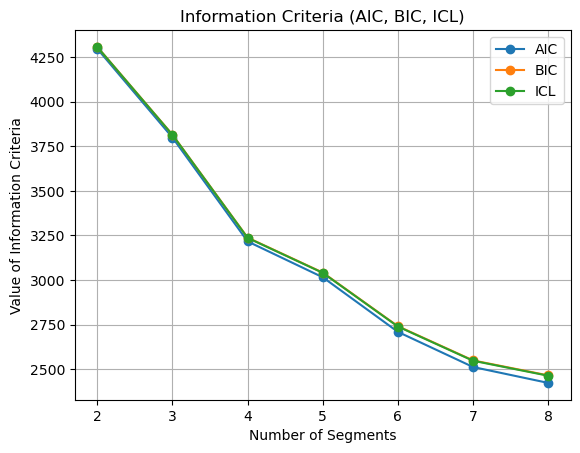

In [17]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [18]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        508    0    4   39
1          0  215   11    4
2         44    3  267    8
3          0   36   15  299
kmeans   0   1   2   3
kmeans                
0       22  29  14  73
1        9  10   7  26
2       15  14   5  42
3        9  20  13  42


c:\Users\akhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [19]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.068744792060572
Log-likelihood for MD.m4: 3.6427464011765824


In [20]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


C:\Users\akhil\AppData\Local\Temp\ipykernel_11232\1008934694.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  like_counts = pd.value_counts(data['Like'])


In [21]:
# Define a mapping of string values to numeric codes
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)


like_n_counts = data['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [22]:
from patsy import dmatrices

independent_vars = data.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=data)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [23]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


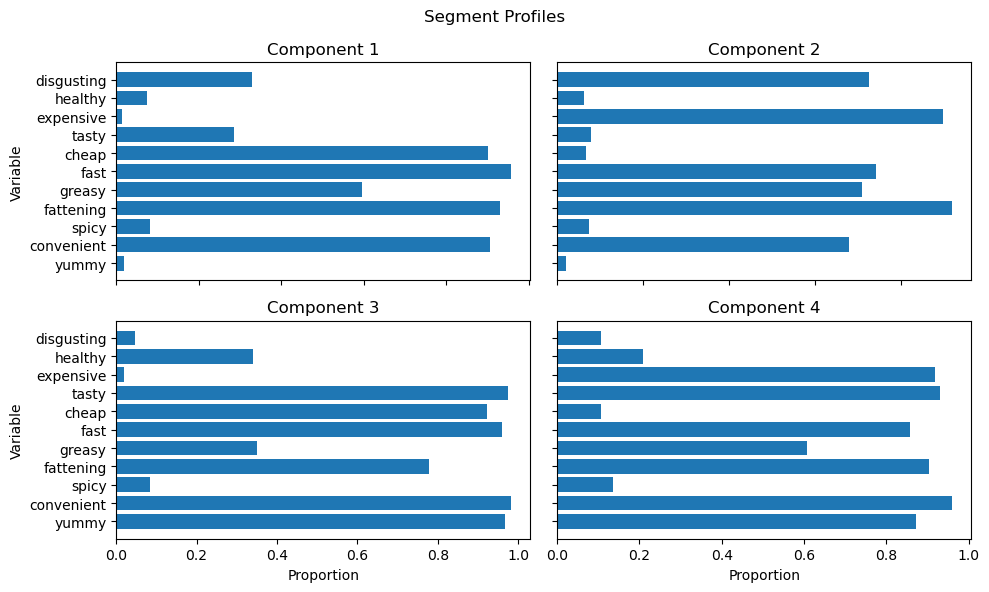

In [24]:
import pandas as pd
# Importing pandas for data manipulation

import matplotlib.pyplot as plt
# Importing matplotlib for plotting
kmeans = MD_km28['4']

import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

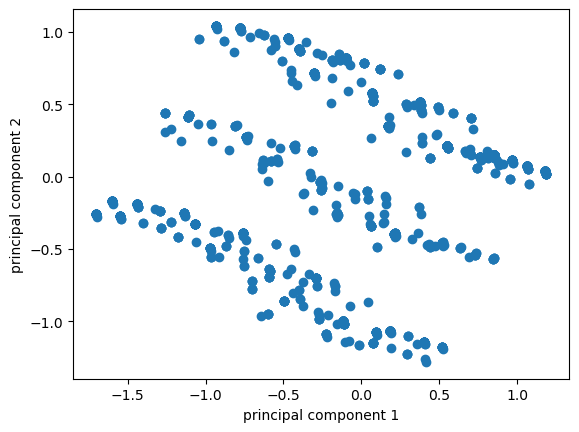

In [25]:
from sklearn.cluster import KMeans # Importing KMeans clustering algorithm from sklearn

from sklearn.decomposition import PCA # Importing PCA (Principal Component Analysis) for dimensionality reduction
import matplotlib.pyplot as plt # Importing matplotlib for plotting
kmeans = KMeans(n_clusters=4) # Creating a KMeans model with 4 clusters
kmeans.fit(MD) # Fitting the KMeans model on the dataset 'MD'
pca = PCA(n_components=2) # Initializing PCA to reduce data to 2 principal components
MD_pca = pca.fit_transform(MD) # Applying PCA on 'MD' to transform it into 2D data for visualization
fig, ax = plt.subplots() # Creating a new matplotlib figure and axis
ax.scatter(MD_pca[:, 0], MD_pca[:, 1]) # Creating a scatter plot using the two principal components
ax.set_xlabel('principal component 1') # Labeling the x-axis as the first principal component
ax.set_ylabel('principal component 2') # Labeling the y-axis as the second principal component
plt.show() # Displaying the scatter plot

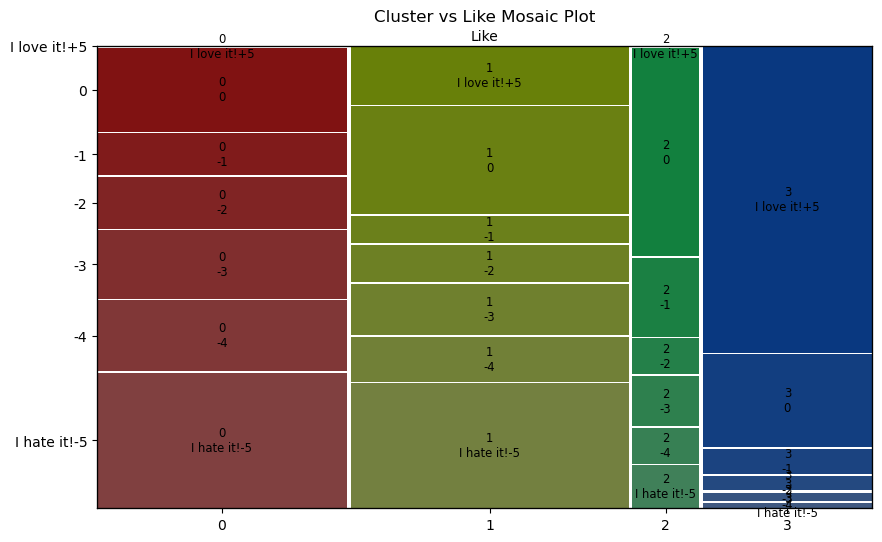

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from statsmodels.graphics.mosaicplot import mosaic

# Sample: assuming you already have `data1` DataFrame loaded
# If not, load it here like: data1 = pd.read_csv('your_file.csv')

# Define a function to apply label encoding
def labelling(x):
    data1[x] = LabelEncoder().fit_transform(data1[x])
    return data1

# List of 11 categorical columns (yes/no features)
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Apply label encoding to each categorical column
for i in cat:
    labelling(i)

# Extract only the 11 encoded columns into a new DataFrame
df_eleven = data1.loc[:, cat]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
data1['cluster_num'] = kmeans.fit_predict(df_eleven)

# Create a crosstab of clusters vs. 'Like' column
crosstab = pd.crosstab(data1['cluster_num'], data1['Like'])

# Check actual column types in crosstab
# Convert column names to string for consistent plotting
crosstab.columns = crosstab.columns.astype(str)

# Define the desired order of Like responses (only include those that exist)
ordered_columns = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'I love it!+5']
ordered_columns = [col for col in ordered_columns if col in crosstab.columns]

# Reorder crosstab columns
crosstab = crosstab[ordered_columns]

# Set plot size and display mosaic plot
plt.rcParams['figure.figsize'] = (10, 6)
mosaic(crosstab.stack(), title='Cluster vs Like Mosaic Plot')
plt.xlabel("Like")
plt.ylabel("Cluster")
plt.show()


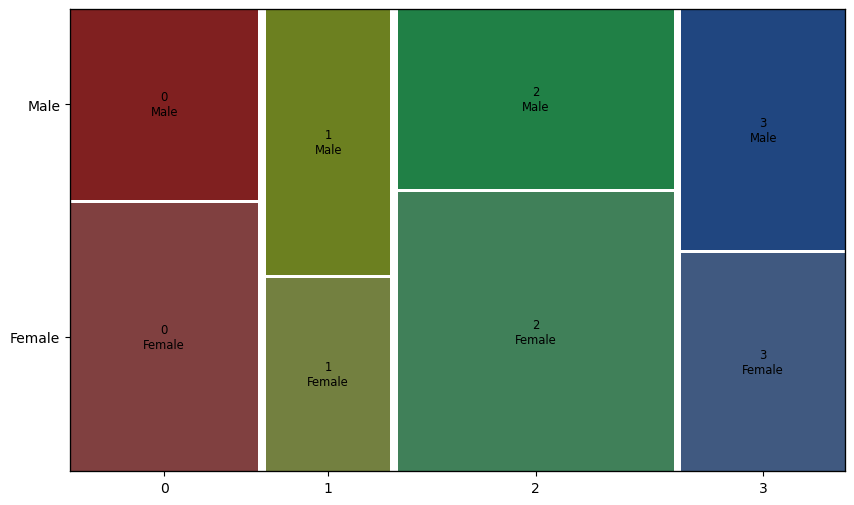

In [28]:
from statsmodels.graphics.mosaicplot import mosaic # Importing the mosaic plot function from statsmodels for categorical data visualization
MD_k4=MD_km28['4'] # Extracting the clustering model for 4 clusters from the dictionary MD_km28
k4 = MD_k4.labels_ # Getting the cluster labels assigned by the k-means model for each data point
ct = pd.crosstab(k4, data['Gender']) # Creating a cross-tabulation table of cluster labels vs. gender counts
ct # Displaying the cross-tabulation table
mosaic(ct.stack(),gap=0.01) # Plotting a mosaic plot to visually compare gender distribution across clusters with minimal gap
plt.show() # Displaying the mosaic plot



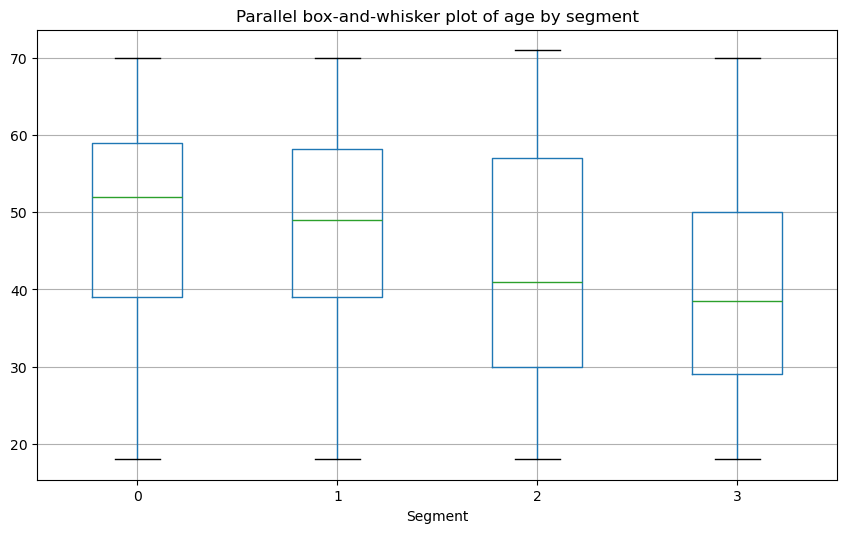

In [29]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']}) # Creating a new DataFrame with 'Segment' labels (from k-means result k4) and corresponding 'Age' values
df.boxplot(by='Segment', column='Age') # Creating a box-and-whisker plot of 'Age' grouped by 'Segment' to show age distribution across segments
plt.title('Parallel box-and-whisker plot of age by segment') # Setting the title for the plot
plt.suptitle('') # Removing the default subplot title to keep the plot clean
plt.show() # Displaying the box plot



In [30]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
# Encoding the 'VisitFrequency' column into numeric values using LabelEncoder
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
# Calculating the average visit frequency for each cluster
visit = visit.to_frame().reset_index()
# Converting the result to a DataFrame and resetting the index
visit
# Displaying the DataFrame showing average visit frequency per cluster



,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [31]:

#Like
data1['Like'] = LabelEncoder().fit_transform(data1['Like']) # Encoding the 'Like' column into numeric values using LabelEncoder (e.g., Like = 1, Dislike = 0)
Like = data1.groupby('cluster_num')['Like'].mean()# Calculating the average 'Like' score for each cluster to understand cluster-wise preference
Like = Like.to_frame().reset_index() # Converting the result into a DataFrame and resetting the index
Like # Displaying the DataFrame with average 'Like' scores per cluster


,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [32]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender']) # Encoding the 'Gender' column as numerical values (e.g., Male = 1, Female = 0) using LabelEncoder
Gender = data1.groupby('cluster_num')['Gender'].mean()# Calculating the mean gender value for each cluster group (helps indicate gender distribution in clusters)
Gender = Gender.to_frame().reset_index()# Converting the Series to a DataFrame and resetting the index for clarity
Gender # Displaying the final DataFrame showing average gender per cluster


,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


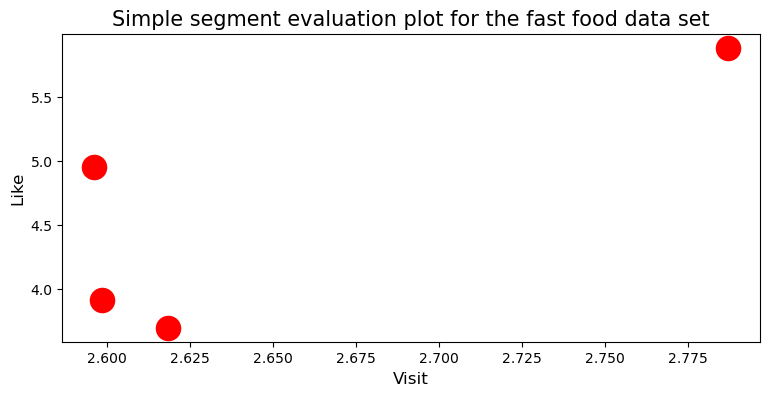

In [33]:
import seaborn as sns # Importing the seaborn library for statistical data visualization
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left') # Merging the 'Gender', 'Like', and 'visit' DataFrames on the 'cluster_num' column using left join to create a consolidated 'segment' DataFrame

segment# Displaying the merged DataFrame
plt.figure(figsize = (9,4))# Creating a new figure with a specific size of 9 inches by 4 inches
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r") # Plotting a scatter plot using seaborn with 'VisitFrequency' on x-axis and 'Like' on y-axis, red color and size 400 for points
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)# Adding a title to the plot with font size 15
plt.xlabel("Visit", fontsize = 12)# Labeling the x-axis as "Visit" with font size 12
plt.ylabel("Like", fontsize = 12)# Labeling the y-axis as "Like" with font size 12
plt.show()# Displaying the final plot